# Airline Analysis

In this project, I'll imagine that I work for a travel agency and need to know the ins and outs of airline prices for my clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.


I decide to look into my favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, I'll explore a dataset for the first time and get to know each of these features. This is a space for me practice descriptive analysis.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
Median:  380.56
Mean:  376.5852530821279


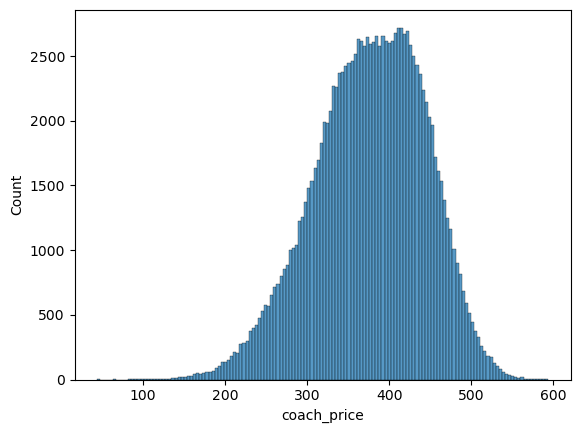

<Figure size 640x480 with 0 Axes>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

coach_price_avg = np.mean(flight.coach_price)
coach_price_median = np.median(flight.coach_price)
print('Median: ',coach_price_median)
print('Mean: ', coach_price_avg)
sns.histplot(flight.coach_price)
plt.show()
plt.clf()


CONCLUSION: The average coach ticket price is $376, so $500 is not a good price for the ticket.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights?

     miles  passengers  delay inflight_meal inflight_entertainment  \
75    4182         209      0           Yes                    Yes   
81    4158         213      0            No                    Yes   
111   4269         217      0            No                     No   
290   4239         221      0            No                    Yes   
295   4131         230      0            No                     No   

    inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
75            Yes   Wednesday     No      No      416.320           1441.36   
81            Yes    Saturday     No     Yes      474.350           1712.92   
111           Yes      Sunday     No     Yes      407.125           1614.34   
290           Yes    Saturday     No     Yes      432.905           1678.51   
295           Yes      Friday     No     Yes      406.565           1591.73   

     hours  
75       8  
81       8  
111      8  
290      8  
295      8  
Median:  437.115
Mean:  43

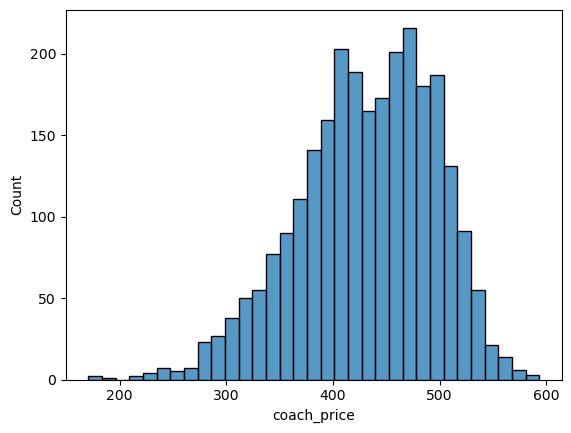

<Figure size 640x480 with 0 Axes>

In [8]:
eight_hours = flight[flight.hours ==8]
print(eight_hours.head())
coach_price_avg8 = np.mean(eight_hours.coach_price)
coach_price_median8 = np.median(eight_hours.coach_price)
print('Median: ',coach_price_median8)
print('Mean: ', coach_price_avg8)
sns.histplot(eight_hours.coach_price)
plt.show()
plt.clf()

CONCLUSION: For flights that are 8 hour long, the average price seems to be higher ($431), so the price of $500 seems to be more reasonable price than before.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. I want to better understand how often there are large delays so I can correctly set up connecting flights.

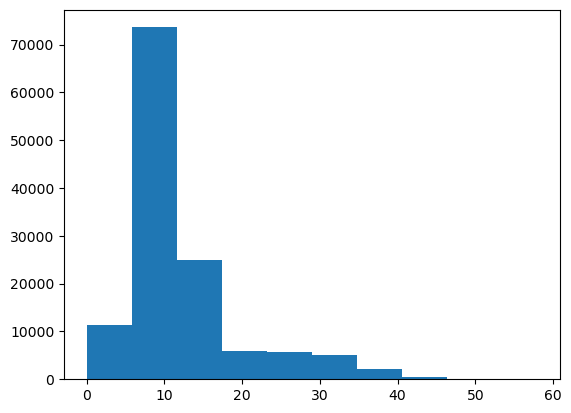

<Figure size 640x480 with 0 Axes>

In [15]:
## Task 3
plt.hist(flight.delay[flight.delay <500])
plt.show()
plt.clf()



CONCLUSION: In case of delay, client might expect the flight to be 10-15 mins late for departure in most of cases. However, sometimes it could be up to 45 mins. Therefore, if the client has connecting flights, I will include 45-60 mins in the connecting time while setting up the flights. 

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

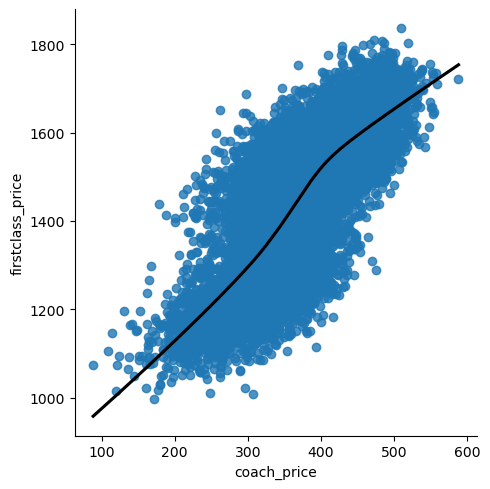

<Figure size 640x480 with 0 Axes>

In [17]:
## Task 4
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()


CONCLUSION: There's an association between couch_price and firstclass_price. Flights with higher coach prices tend to have higher first-class prices as well

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

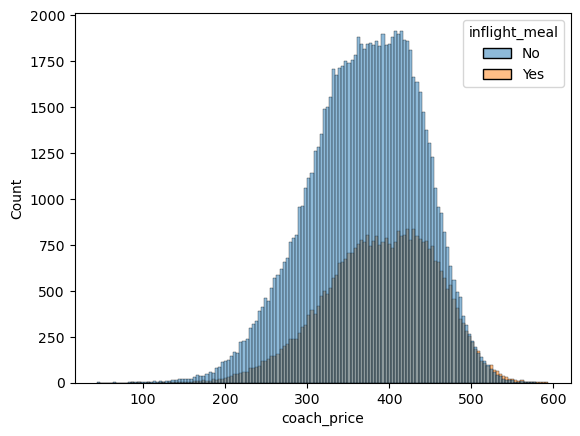

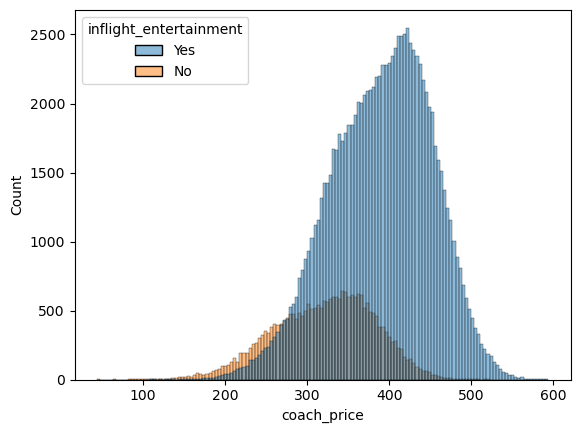

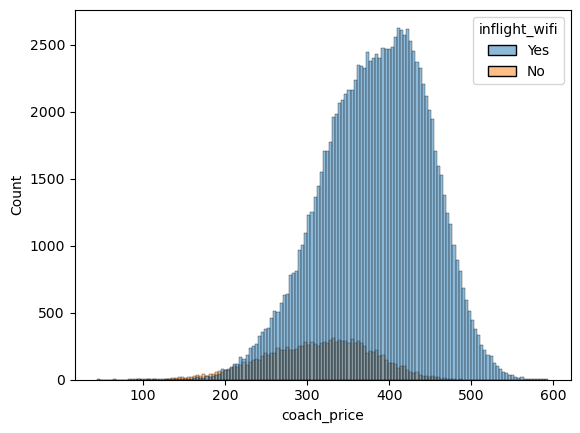

<Figure size 640x480 with 0 Axes>

In [18]:
## Task 5
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()


CONCLUSION: There's an association between coach prices and inflight features — inflight meal, inflight entertainment, and inflight WiFi. 
Wifi is associated with the highest increase in price

6. How does the number of passengers change in relation to the length of flights?

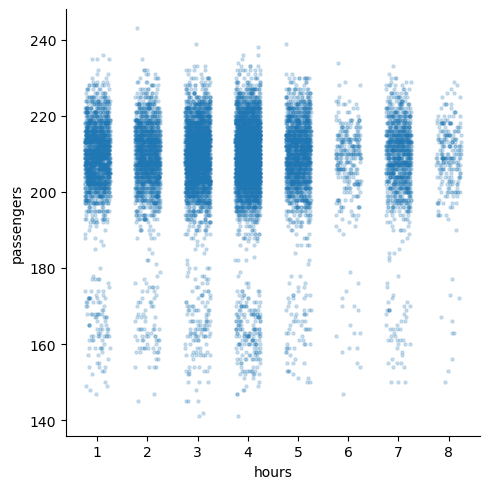

<Figure size 640x480 with 0 Axes>

In [19]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()


CONCLUSION: Flight with 1-5 hours often have 200-230 passengers. Hours and passengers have week assocation. 

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

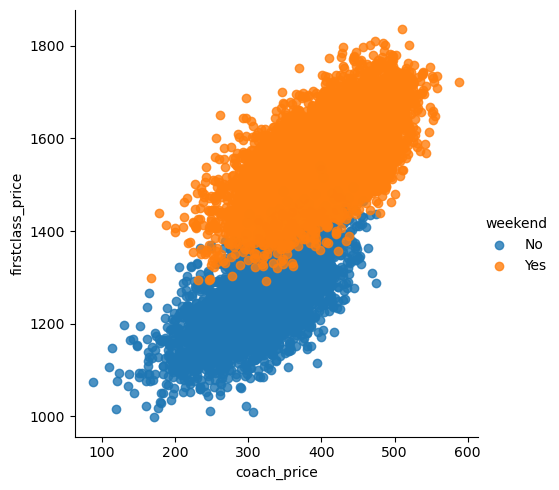

<Figure size 640x480 with 0 Axes>

In [27]:
## Task 7
sns.lmplot(x= 'coach_price', y= 'firstclass_price', hue='weekend', data= flight_sub, fit_reg=False)
plt.show()
plt.clf()

CONCLUSION: Both coach price and first-class price are higher during the weekend, compared to the weeekdays.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

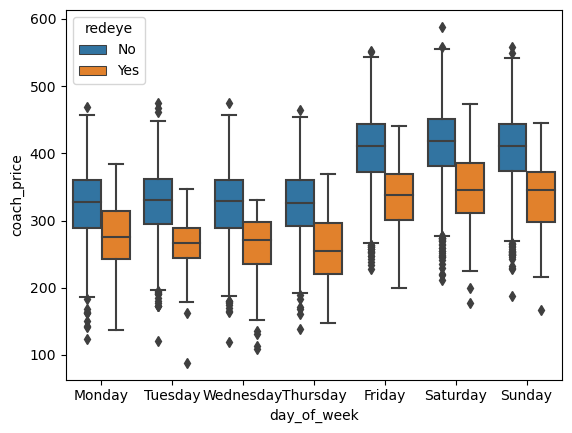

<Figure size 640x480 with 0 Axes>

In [31]:
## Task 8
order_day = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x= 'day_of_week', y='coach_price', hue= 'redeye', data= flight_sub, order = order_day)
plt.show()
plt.clf()




#### CONCLUSION: Coach price from Friday til Sunday seems to be higher than the price during the weekday. In general, non-redeye flights will have the higher price for the whole week, but the price difference increase during the weekends(from Friday to Sunday)